# Dự án Phân tích hành vi khách hàng & Đề xuất tăng doanh thu


## Thu thập dữ liệu và tổng quan

In [1]:
import pandas as pd
  
PATH = "Online Retail.csv"
data = pd.read_csv(PATH, encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Thông tin bộ dữ liệu

- Bộ dữ liệu được lấy từ UCI Machine Learning. Đường link: https://archive.ics.uci.edu/dataset/352/online+retail. Bộ dữ liệu bao gồm tập hợp các giao dịch của các khách hàng từ 1/12/2010 đến 9/12/2011 ở UK của một công ty bán lẻ trực tuyến không thông qua cửa hàng. Công ty chủ yếu bán các món hàng quà tặng độc đáo và khách hàng đa số là các nhà buôn bán sỉ.
- Các biến trong bộ dữ liệu bao gồm:
    + InvoiceNo: Mã 6 chữ số duy nhất cho từng giao dịch, nếu bắt đầu bằng ký tự 'c' nghĩa là giao dịch bị hủy.
    + StockCode: Mã 5 chữ số duy nhất cho từng sản phẩm riêng biệt.
    + Description: Tên sản phẩm.
    + Quantity: Số lượng sản phẩm mỗi giao dịch.
    + InvoiceDate: ngày và giờ giao dịch được thực hiện.
    + Unitprice: Giá sản phẩm trên 1 đơn vị (bảng Anh).
    + CustomerID: Mã 5 chữ số duy nhất cho từng khách hàng.
    + Country: Tên quốc gia nơi mỗi khách hàng cư trú.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- Biến InvoiceDate chỉ ngày nhưng đang ở kiểu Object nên ta sẽ ép kiểu về date, các biến còn lại không có vấn đề về kiểu dữ liệu
- Biến CustomerID cần đưa về kiểu số nguyên

In [3]:
data.shape

(541909, 8)

## Tiền xử lý dữ liệu

### Xử lý giá trị thiếu

In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
print("Tỷ lệ giá trị bị thiếu của cột Description: ", data['Description'].isnull().sum() / data.shape[0] * 100,"%")
print("Tỷ lệ giá trị bị thiếu của cột CustomerID: ", data['CustomerID'].isnull().sum() / data.shape[0] * 100,"%")

Tỷ lệ giá trị bị thiếu của cột Description:  0.2683107311375157 %
Tỷ lệ giá trị bị thiếu của cột CustomerID:  24.926694334288598 %


- Ta có các giá trị bị thiếu ở phần Description và CustomerID.
    + Mặc dù phần bị thiếu ở CustomerID khá lớn nhưng mục tiêu của dự án là phân tích hành vi khách hàng nên với những giao dịch ta không biết được khách hàng là ai thì sẽ làm cho việc phân tích bị sai lệch nên ta phải loại bỏ những giá trị này. 
    + Với Description chiếm tỷ lệ khá ít nên ta có thể loại bỏ nó vì nó không ảnh hưởng nhiều

In [6]:
data.dropna(subset = ['CustomerID','Description'],inplace = True)
print("Bộ dữ liệu sau khi loại bỏ các giá trị bị thiếu")
data.shape

Bộ dữ liệu sau khi loại bỏ các giá trị bị thiếu


(406829, 8)

### Xử lý giá trị lặp

In [7]:
print("Số giá trị lặp: ",data.duplicated().sum())
print("Tỷ lệ giá trị bị lặp: ",data.duplicated().sum()/data.shape[0]*100,"%")

Số giá trị lặp:  5225
Tỷ lệ giá trị bị lặp:  1.284323388942283 %


- Bộ dữ liệu có khá nhiều dòng giống nhau nhưng không chiếm quá nhiều nên ta có thể bỏ đi chúng

In [8]:
data.drop_duplicates(inplace=True)
print("Bộ dữ liệu sau khi loại bỏ các giá trị bị lặp")
data.shape

Bộ dữ liệu sau khi loại bỏ các giá trị bị lặp


(401604, 8)

### Đưa các cột về dạng dữ liệu phù hợp

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%m/%d/%Y %H:%M")
print(data['InvoiceDate'].dtype)

data['CustomerID'] = data['CustomerID'].astype(int)
print(data['CustomerID'].dtype)

datetime64[ns]
int64


### Loại bỏ các dòng có Quantity âm

- Do mục tiêu phân tích làm hành vi khách hàng nên các giao dịch bị trả lại hàng hoặc bị hủy thì có thể làm sai lệch các thông số như doanh thu, tổng số lượng bán. Ngoài ra ta còn phải đề xuất tăng doanh thu nên bộ dữ liệu chỉ nên tập trung vào việc các đơn hàng đã được thực hiện để hiểu xem khách hàng muốn mua gì, mua bao nhiêu và thường mua kèm với những gì vì vậy việc các đơn hàng bị hủy (Quantity < 0) có thể làm sai lệch kết quả phân tích.

In [10]:
data = data[data['Quantity'] > 0]
print("Bộ dữ liệu sau khi loại bỏ các đơn hàng bị hủy: ", data.shape)

Bộ dữ liệu sau khi loại bỏ các đơn hàng bị hủy:  (392732, 8)


### Tính thêm cột TotalAmount để thể hiện tổng tiền cho từng dòng

In [11]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

## Khám phá dữ liệu (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Tổng doanh thu theo tháng

C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\315661301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='InvoiceDate', y='TotalAmount', data=sale_by_month, palette='viridis', errorbar=None)


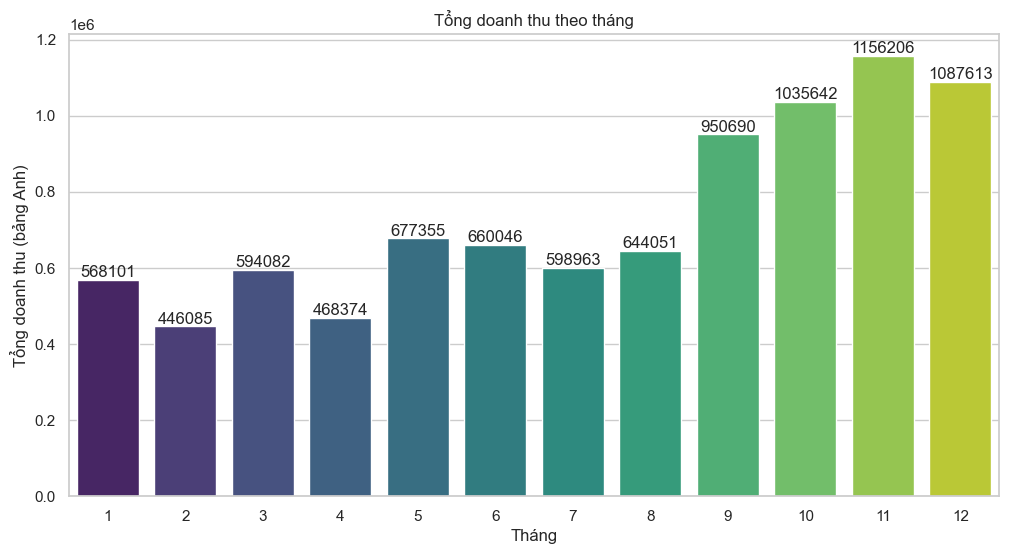

In [13]:
sale_by_month = data['TotalAmount'].groupby(data['InvoiceDate'].dt.month).sum().reset_index()
sale_by_month.columns = ['InvoiceDate', 'TotalAmount']
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
plt.title("Tổng doanh thu theo tháng")
ax = sns.barplot(x='InvoiceDate', y='TotalAmount', data=sale_by_month, palette='viridis', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu (bảng Anh)")
plt.show()

- Dựa vào tổng doanh thu theo từng tháng ta có thể thấy, những tháng cao điểm là những tháng cuối năm (9 - 12) với doanh thu cao nhất là tháng 11 và những tháng thấp điểm là những tháng đầu năm (1-4) và bình ổn ở những tháng còn lại trong năm.
    + Với những tháng cuối năm, doanh thu tăng cao có thể thấy đây là mùa mà nhu cầu mua quà tặng và nhập hàng từ các nhà buôn sỉ cao nhất (mùa đông). Có thể đây là những tháng được chạy các chương trình khuyến mãi hoặc các ngày lễ cuối năm như giáng sinh nên ta có thể đẩy mạnh chiến dịch quảng cáo vào những tháng này để có thể tối đa doanh thu.
    + Với những tháng đầu năm, nhu cầu mua quà và nhập hàng có sự sụt giảm mạnh. Có thể đây là những tháng sau mùa lễ cuối năm nên nhiều người không có nhu cầu mua hàng vì vậy nếu cần ta có thể thêm các chương trình khuyến mãi hoặc quảng cáo để cải thiện doanh thu.
    + Những tháng còn lại trong năm, doanh thu không quá cao cũng không quá thấp. Đây là các tháng mùa hè giữa năm nên ta có thể phát động các chiến dịch quảng cáo mùa hè để tăng doanh thu đồng thời sản xuất thêm hàng tồn kho để có thể chuẩn bị tốt vào thời điểm cuối năm.

### Top sản phẩm bán chạy

In [14]:
print("Số sản phẩm khác nhau có trong bộ dữ liệu: ",data['Description'].unique().size)

Số sản phẩm khác nhau có trong bộ dữ liệu:  3877


C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\963922013.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TotalAmount', y='Product Name', data=best_selling_products,palette='viridis', errorbar=None)


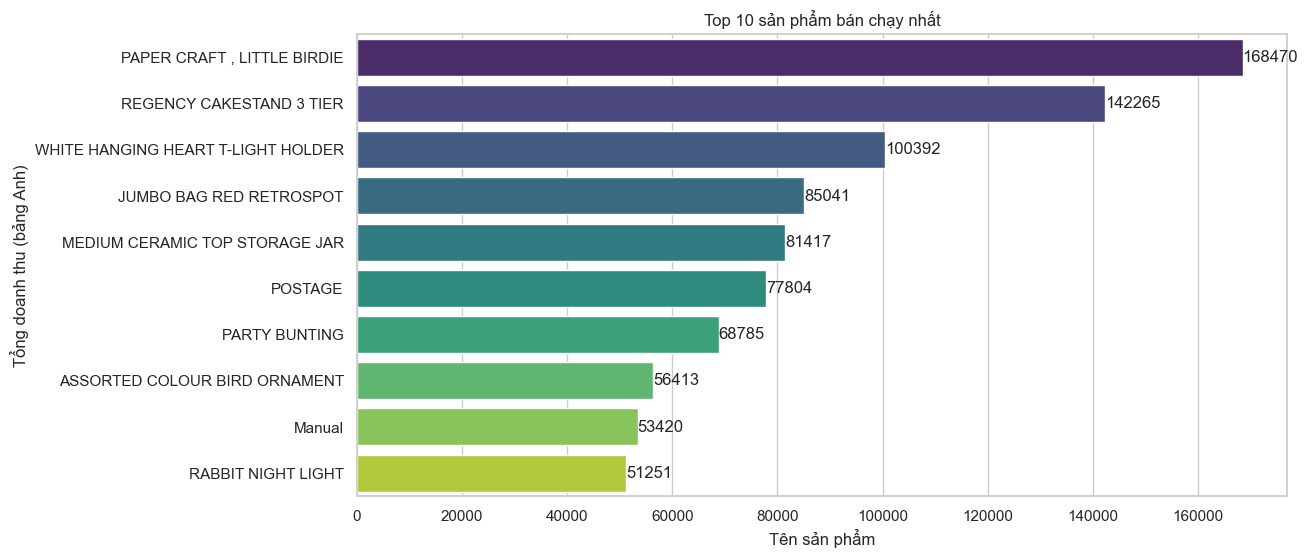

In [15]:
best_selling_products = data.groupby('Description')['TotalAmount'].sum().reset_index().sort_values(by='TotalAmount', ascending=False).head(10)
best_selling_products.columns = ['Product Name','TotalAmount']
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12,6))
plt.title("Top 10 sản phẩm bán chạy nhất")
ax = sns.barplot(x='TotalAmount', y='Product Name', data=best_selling_products,palette='viridis', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  
plt.xlabel("Tên sản phẩm")
plt.ylabel("Tổng doanh thu (bảng Anh)")
plt.show()

- Trong số 3877 sản phẩm khác nhau được bán bởi công ty này thì sản phẩm có doanh thu nhiều nhất là "PAPER CRAFT, LITTLE BIRDIE" với doanh thu 168470 bảng Anh, đây có thể là món quà được ưa chuộng bởi các khách hàng, ngoài ra còn có "REGENCY CAKESTAND 3 TIER" đứng thứ 2 với 142265 bảng Anh và vẫn kém sản phẩm đầu tiên khá nhiều chứng tỏ sản phẩm đầu tiên là sản phẩm chủ lực của công ty này nên dựa vào đó ta có thể sản xuất nhiều hơn những sản phẩm như vậy để góp phần tăng doanh thu hoặc phát triển thêm các sản phẩm dựa trên sản phẩm đầu để có thể phát huy tối đa doanh thu với mặt hàng này.
- Các sản phẩm khác trong top 10 có đến 4 sản phẩm thuộc vào sản phẩm dùng để trang trí nội thất hoặc tiệc tùng đây cũng có thể là một mục tiêu chúng ta có thể hướng tới với nhóm sản phẩm này vì kết hợp thêm với biểu đồ doanh thu các tháng có doanh thu cao thường là vào các dịp lễ nên sản phẩm loại này khá đắt hàng.
- Ngoài ra với sự chênh lệch lớn từ sản phẩm top 10 và top 1 khá lớn khoảng 1/3 thì chúng ta có thể tiếp tục phát triển mở rộng hơn cho các sản phẩm top dưới 
- Mặc dù sản phẩm đầu tiên chiếm ưu thế nhưng ta vẫn thấy từ top 3 trở lên doanh thu vẫn hơn 100000 bảng Anh vì vậy đây vẫn là các sản phẩm chủ lực của công ty có thể đầu tư hơn vào các chiến dịch quảng cáo hoặc phát triển các sản phẩm mới từ đó để có thể tối đa hóa doanh thu nhất.
- Các sản phẩm dưới top 3 có doanh thu không quá cao nhưng vẫn đáng để đầu tư vì để phòng tránh các rủi ro không cung cấp đủ hàng để bán ở các sản phẩm trên ta vẫn có thể bù lại bằng cách đa dạng hóa các mặt hàng top dưới.

### Phân tích tổng doanh thu các sản phẩm trong các tháng đạt doanh thu cao

C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\386651228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TotalAmount', y='Product Name', data=best_selling_products_month,palette='viridis', errorbar=None)
C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\386651228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TotalAmount', y='Product Name', data=best_selling_products_month,palette='viridis', errorbar=None)
C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\386651228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplo

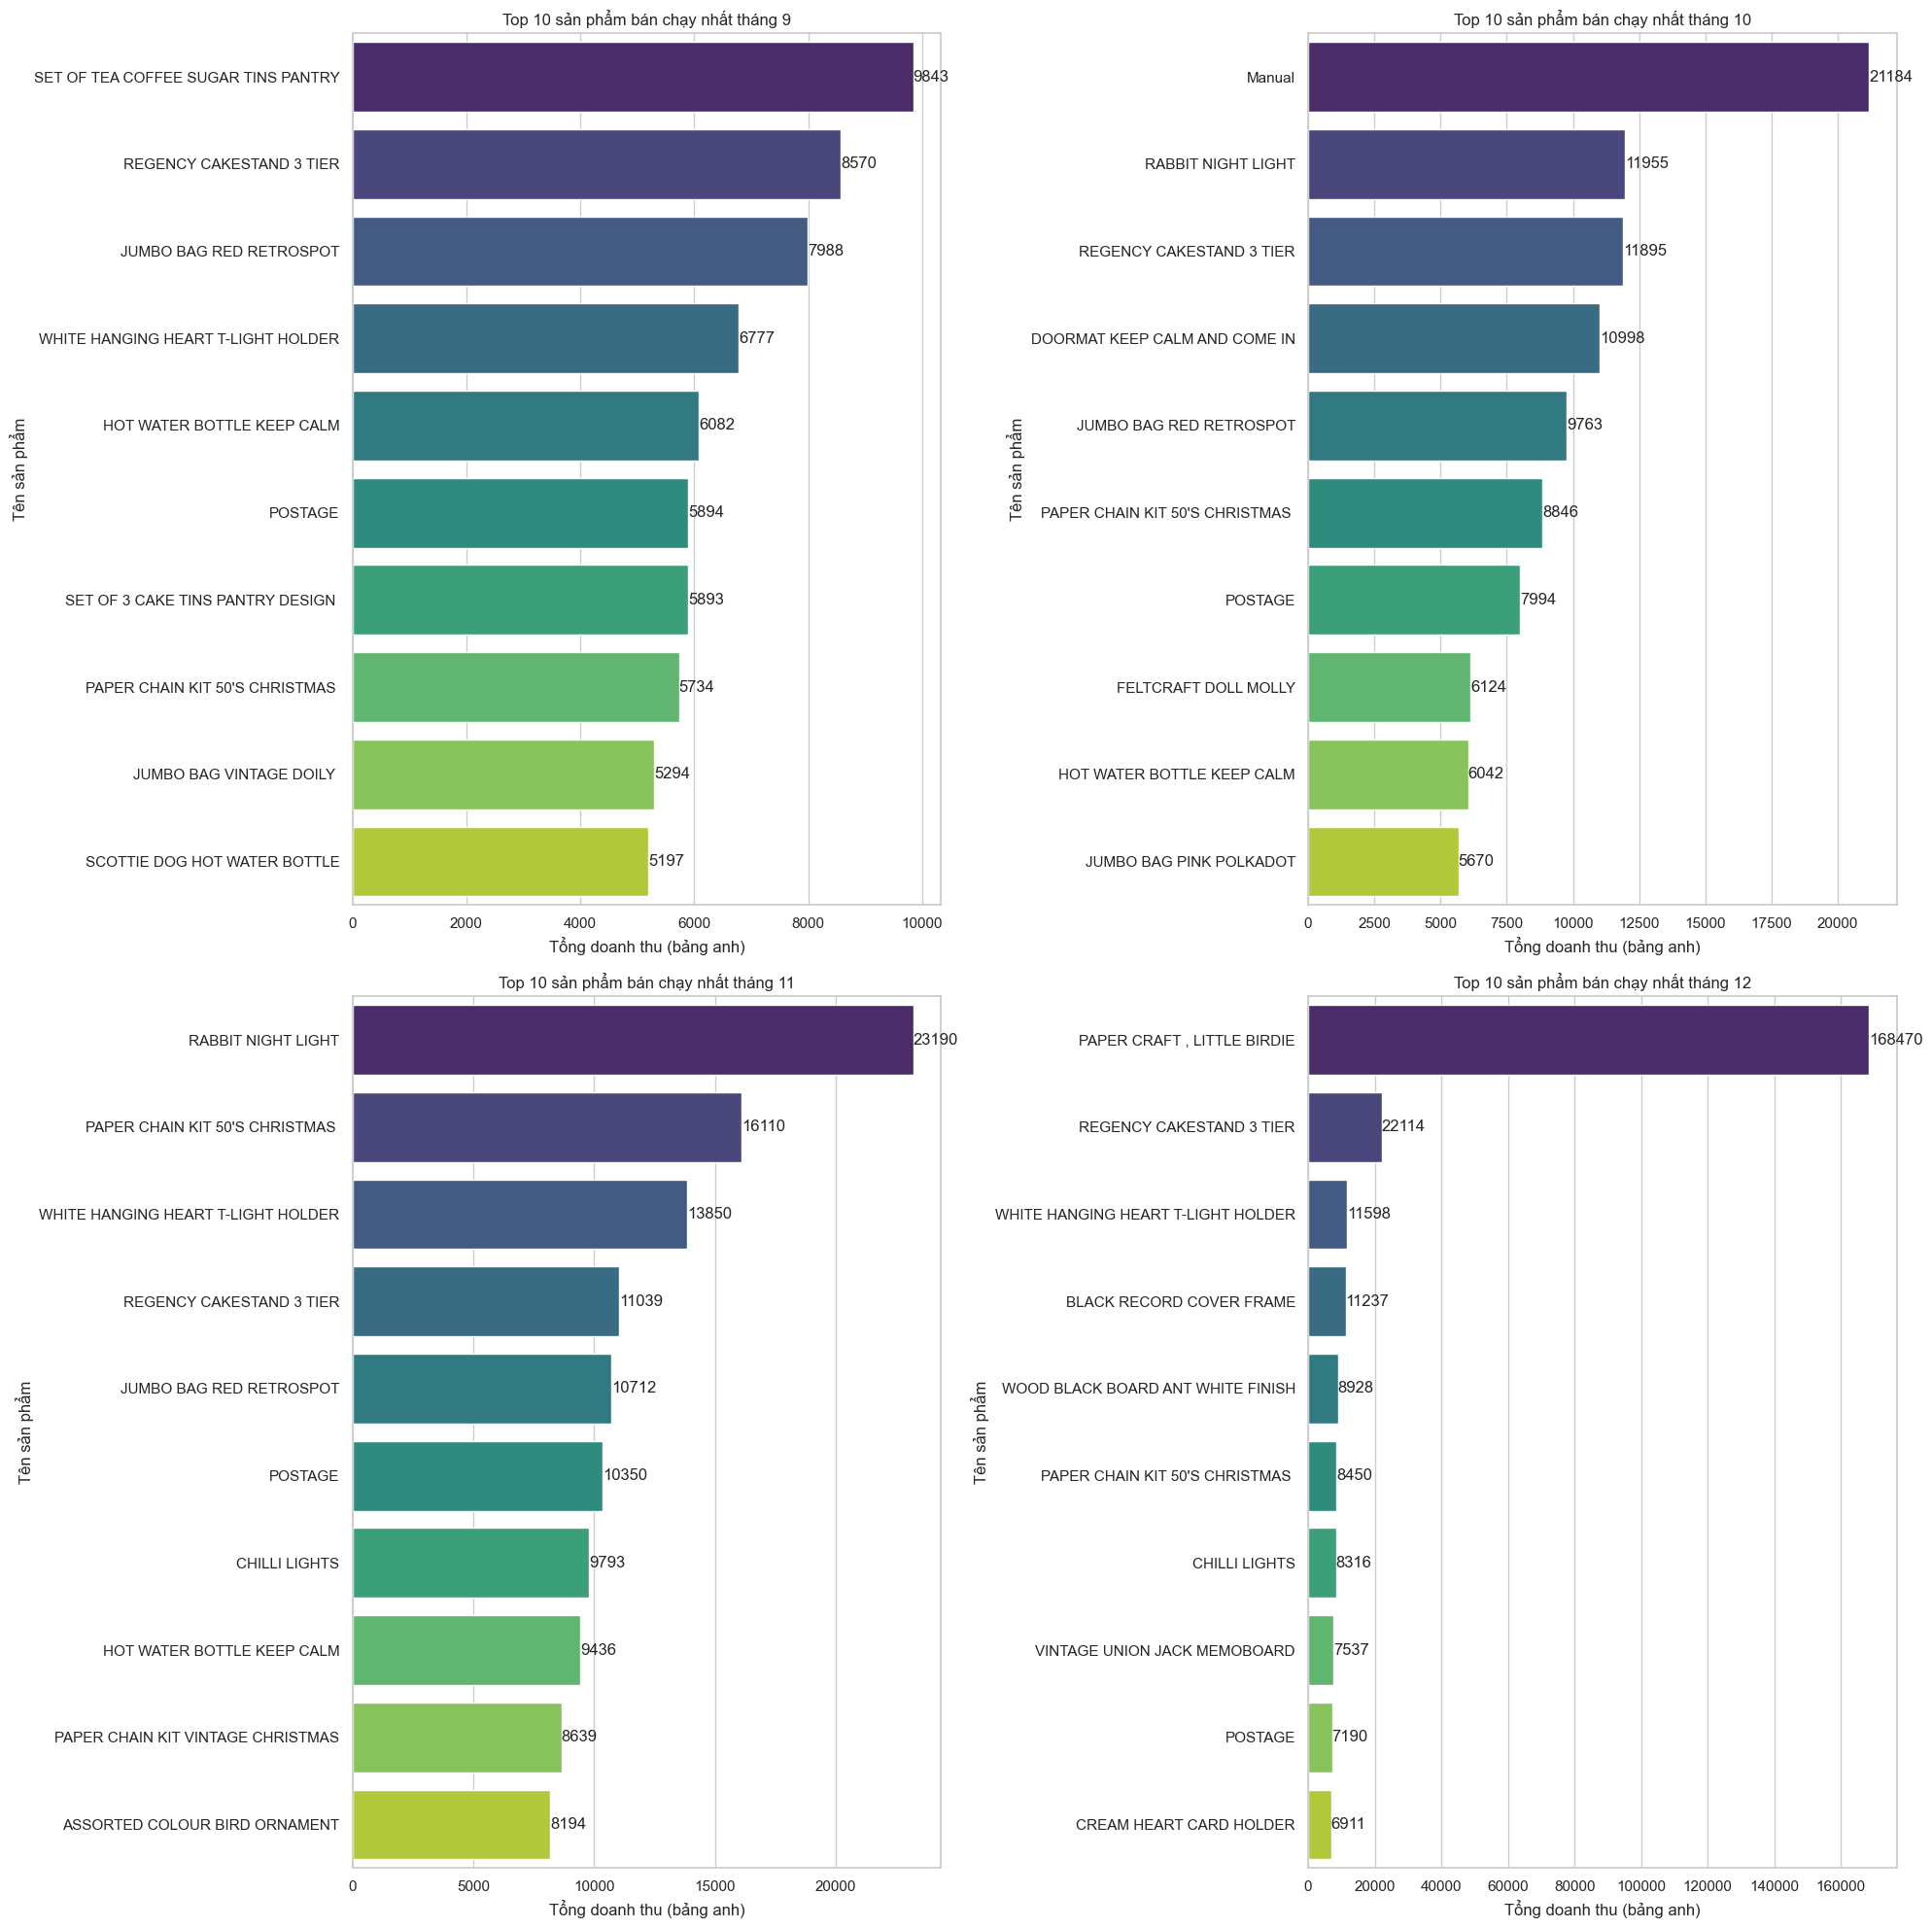

In [16]:
plt.figure(figsize = (20,20))
sns.set_theme(style = 'whitegrid')
for i in range(9,13):
    plt.subplot(2,2,i-8)
    best_selling_products_month = data[data['InvoiceDate'].dt.month == i].groupby('Description')['TotalAmount'].sum().reset_index().sort_values(by='TotalAmount', ascending=False).head(10)
    best_selling_products_month.columns = ['Product Name','TotalAmount']
    plt.title(f"Top 10 sản phẩm bán chạy nhất tháng {i}")
    ax = sns.barplot(x='TotalAmount', y='Product Name', data=best_selling_products_month,palette='viridis', errorbar=None)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f') 
    plt.xlabel("Tổng doanh thu (bảng anh)")
    plt.ylabel("Tên sản phẩm")
plt.tight_layout()
plt.show()

- Có thể thấy mặc dù sản phẩm "PAPER CRAFT , LITTLE BIRDIE" đứng đầu doanh thu nhưng nó chỉ xuất hiện vào tháng 12 còn các tháng còn lại đạt doanh thu cao không có sự xuất hiện của sản phẩm trong top 10 và tổng doanh thu của sản phẩm này trong tháng 12 đúng bằng tổng doanh thu của sản phẩm này trong tất cả các tháng thì có thể thấy đây là một đơn đặt hàng lớn cuối năm.
- Ngoài ra ta còn có thể thấy xu hướng và thị hiếu người dùng, các đơn đặt hàng thay đổi theo từng tháng với tháng 9 các sản phẩm liên quan đến thực phẩm, bảo quản thức ăn hay hay các gia dụng liên quan chiếm ưu thế trong top 10 và cụ thể hơn là các sản phẩm như "SET OF TEA COFFEE SUGAR TINS PANTRY", "HOT WATER BOTTLE" hay "JUMBO BAG". Những sản phẩm dùng để chuẩn bị cho mùa đông rất được ưa chuộng vào tháng này.
- Với tháng 10 các sản phẩm về bảo quản thực phẩm vẫn khá được ưa chuộng bên cạnh các sản phẩm về trang trí cho mùa lễ hội như Halloween hoặc Giáng sinh với các sản phẩm "RABBIT NIGHT LIGHT", "PAPER CHAIN KIT 50's CHRISTMAS hoặc "FELTCRAFT DOLL MOLLY".
- Với tháng 11 các sản phẩm trang trí bắt đầu bán chạy hơn và chiếm ưu thế trong top 10 với việc "RABBIT NIGHT LIGHT" và "PAPER CHAIN KIT" đứng đầu doanh thu của tháng này, đây có lẽ là giai đoạn đa số khách hàng đang chuẩn bị cho kì giáng sinh và lễ.
- Với tháng 12 các mặt hàng quà tặng bùng nổ với đơn lớn cho "PAPER CRAFT, LITTLE BIRDIE" vào cuối năm làm quà tặng hoặc trang trí, bên cạnh đó các sản phẩm trang trí còn lại cũng chiếm ưu thế trong top 10 trong tháng này.
- Qua phân tích doanh thu ở các tháng có doanh thu cao cho các sản phẩm ta có thể nắm bắt được thị hiếu người dùng để có thể chuẩn bị tốt cho các kì lễ, lúc mà người dùng thường có xu hướng mua sắm nhiều hơn. Ngoài ra các sản phẩm best seller về trang trí cũng được lặp lại qua nhiều tháng cho thấy sự ổn định của nhóm sản phẩm này. Riêng việc sản phẩm đứng đầu doanh thu tháng 12 bức phá mạnh cũng có thể gây khó khăn trong việc chuẩn bị đủ hàng tồn kho để phục vụ.
- Công ty nên tăng tồn kho vào những việc cuối năm để có thể đủ số lượng phục vụ vào các tháng cao điểm, duy trì ổn định các sản phẩm best seller lặp lại qua nhiều tháng hoặc cũng có thể phát triển thêm các mặt hàng dựa trên các sản phẩm best seller này để có thể có thể nguồn thu.

In [17]:
data[data['Description'] == 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6


- Đúng với ta đã dự đoán ở trên, sản phẩm đứng top 1 doanh thu tháng 12 là một đơn đặt hàng lớn với số lượng gần 81 ngàn trong 1 đơn đặt hàng vào tháng 12, nếu không chuẩn bị kỹ lưỡng đây có thể là một sự khó khăn cho công ty. 

### Khách hàng mua nhiều nhất

In [18]:
print("Số khách hàng khác nhau trong bộ dữ liệu: ",data['CustomerID'].unique().size)

Số khách hàng khác nhau trong bộ dữ liệu:  4339


C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\778867008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='CustomerID', y='Purchase Count', data=top_customers,order = top_customers['CustomerID'],palette='viridis', errorbar=None)


Text(0, 0.5, 'Số lần mua hàng')

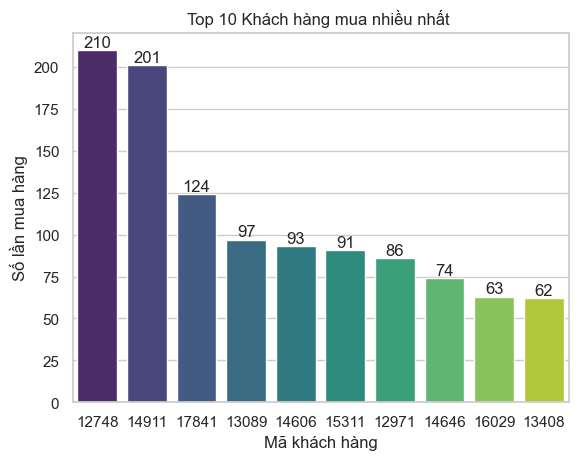

In [19]:
top_customers = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index().sort_values(by='InvoiceNo', ascending=False).head(10)
top_customers.columns = ['CustomerID','Purchase Count']
plt.title(f"Top 10 Khách hàng mua nhiều nhất ")
ax = sns.barplot(x='CustomerID', y='Purchase Count', data=top_customers,order = top_customers['CustomerID'],palette='viridis', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') 
plt.xlabel("Mã khách hàng")
plt.ylabel("Số lần mua hàng")

- Với lần lượt 210 và 201 lượt mua từ khách hàng *12748* và *14911* thì đây có thể là những khách hàng chủ lực của công ty với số lần mua gần gấp đôi người đứng thứ 3 là *17841*, đây có thể là những khách hàng trung thành của công ty hoặc các doanh nghiệp lớn thường xuyên đặt hàng từ công ty.
- Số lượt mua sụt giảm đáng kể từ sau top 2 có thể gây ra sự phụ thuộc mạnh mẽ đối với những khách hàng đứng đầu tiên, nếu họ ngừng đặt hàng hoặc hợp tác với công ty thì doanh thu có thể bị sụt giảm đáng kể. Vì vậy ta nên đưa ra các chương trình khuyến mãi hoặc giá ưu đãi hơn để giữ chân họ và hợp tác lâu dài.
- Ngoài ra dựa vào top 10 ta có thể phân khúc khách hàng ra thành 3 nhóm như nhóm khách hàng VIP, nhóm trung bình và nhóm thấp (ít mua hàng nhất) để có thể đưa ra các chương trình khuyến mãi phù hợp cho từng nhóm khách hàng như thực hiện up-sell/cross-sell để mở rộng phân khúc và tăng tần suất mua hàng của các nhóm này.

### Phân bố các đơn hàng theo quốc gia

In [20]:
print("Những quốc gia có trong bộ dữ liệu: ",data['Country'].unique().size)

Những quốc gia có trong bộ dữ liệu:  37


C:\Users\Hii\AppData\Local\Temp\ipykernel_12604\3505543896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Invoice Count', y='Country', data=country_invoice,palette='viridis', errorbar=None)


Text(0, 0.5, 'Tên quốc gia')

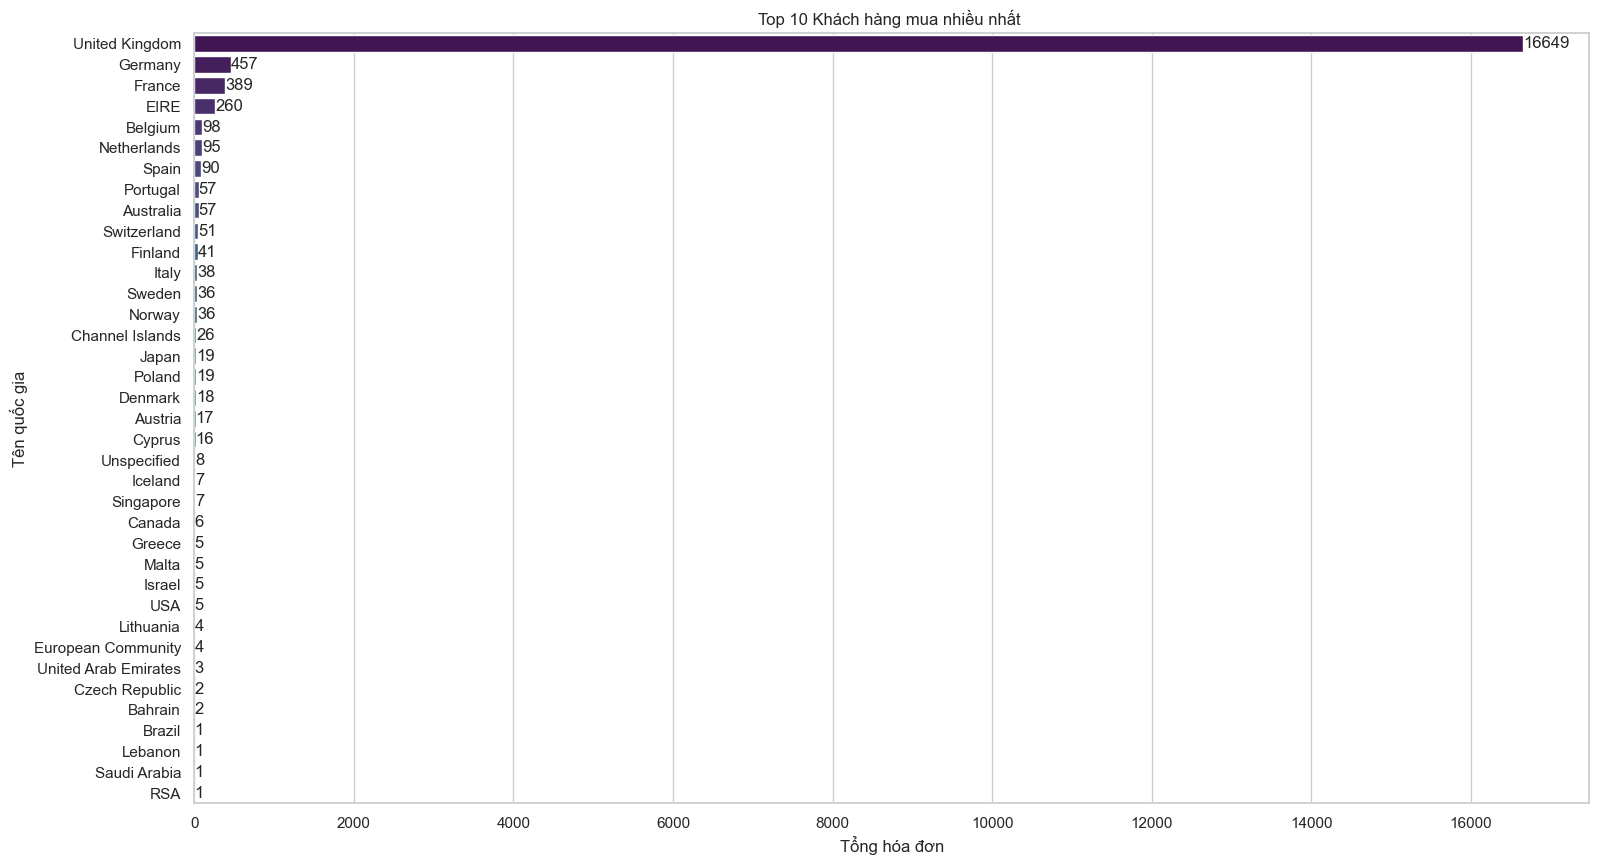

In [21]:
country_invoice = data.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values(by = 'InvoiceNo',ascending = False)
country_invoice.columns = ['Country','Invoice Count']
plt.figure(figsize=(18,10))
plt.title(f"Top 10 Khách hàng mua nhiều nhất ")
ax = sns.barplot(x='Invoice Count', y='Country', data=country_invoice,palette='viridis', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f') 
plt.xlabel("Tổng hóa đơn")
plt.ylabel("Tên quốc gia")

- Với việc công ty nằm tại Anh nên số hóa đơn thực hiện trong nước được chiếm ưu thế với 16649 hóa đơn được thực hiện, theo sau là các nước láng giềng đến từ EU nhưng sự chênh lệch là rất lớn vì vậy ta có thể thấy công ty ưu tiên thị trường trong nước hơn hoặc các mặt hàng của công ty được ưa chuộng trong nước nhiều hơn là nước ngoài. Vì vậy ta có thể đấy mạnh các chiến dịch quảng cáo trong nước đồng thời mở rộng thị trường và các chiến dịch sang các nước trong khối EU để tăng doanh thu.
- Ngoài ra việc để tránh các biến động kinh tế trong nước ảnh hưởng đến hoạt động kinh doanh, công ty có thể cân nhắc việc mở rộng thêm các chi nhánh hoặc các mặt hàng phù hợp với các nước cũng có số lượng đơn hàng ở mức vừa như Germany, France và EIRE. Việc phụ thuộc hoàn toàn vào thị trường trong nước có thể có rủi ro cao.
- Phần lớn đơn hàng vẫn có đến từ các nước châu Âu đây có thể là tiềm năng mở rộng thị trường ở các quốc gia này, có thể thử nghiệm các chiến lược quảng cáo để tăng độ phủ sóng.
- Tổng kết lại công ty vẫn nên củng cố vị trí ở thị trường trong nước vì đây vẫn là thị trường chủ lực của công ty như nâng cao dịch vụ chăm sóc khách hàng, tăng tần suất mua bằng up-sell/cross-sell. Đồng thời mở rộng thị trường ra các nước quanh khu vực châu Âu như Germany, France, EIRE, Belgium để giảm phụ thuộc quá mạnh vào thị trường UK.

## Phân tích RFM và phân nhóm khách hàng

- Ta sẽ đặt ngày bắt đầu phân tích là ngày mới nhất có trong báo cáo cộng thêm 1 ngày để sử dụng các chỉ số:
    + Recency (R): Bao lâu rồi khách chưa đặt hàng
    + Frequency (F): Số lần mua hàng trong thời gian có trong dữ liệu
    + Monetary (M): Tổng số tiền đã chi tiêu

- Với một mã RFM (đã gộp) ta có thể đánh giá 1 khách hàng là tiềm năng hay ít tiềm năng và dựa vào đó để phân nhóm khách hàng và áp dụng các chiến lược phù hợp với từng nhóm khách hàng giúp cải thiện doanh thu.

In [22]:
import datetime as dt
current_date = data['InvoiceDate'].max() + dt.timedelta(days = 1) # Ngày bắt đầu phân tích
print("Ngày bắt đầu phân tích: ", current_date)

Ngày bắt đầu phân tích:  2011-12-10 12:50:00


- Tính RFM cho toàn bộ khách hàng

In [23]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(current_date - x.max()).days, # Recency
    'InvoiceNo':'nunique', # Frequency
    'TotalAmount':'sum' # Monetary 
}).reset_index()

rfm.columns = ['CustomerID','Recency','Frequency','Monetary']

rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40


- Tiếp theo ta sẽ áp dụng thuật toán K-means để có thể gom các khách hàng tương đồng lại thành 1 nhóm từ đó sẽ rút ra được các nhóm khách hàng

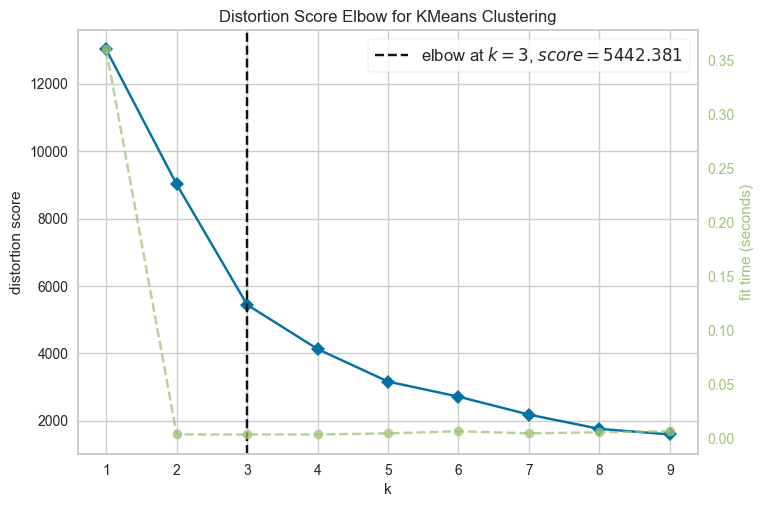

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
elbow_method = KElbowVisualizer(KMeans(),k = (1,10))
elbow_method.fit(rfm_scaled)
elbow_method.show()

- Ta sẽ chia làm 3 nhóm cho thuật toán Kmeans

In [25]:
kmeans = KMeans(n_clusters=3,random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean())


            Recency  Frequency      Monetary
Cluster                                     
0         41.445682   4.671928   1849.097726
1        247.106285   1.582255    629.663689
2          6.038462  66.500000  85826.078077


- Ta có thể rút ra các kết luận về các cụm như sau:
    + Với cụm 0 ta có Recency ở mức trung bình khoảng hơn 41 ngày chưa mua sắm, Frequency khá thấp chỉ gần 5 lần trong thời gian được khảo sát và Monetary cũng hơi thấp ở mức 1849,09 bảng Anh thì ta có thể gọi nhóm khách hàng thuộc vào nhóm 0 là nhóm khách hàng tiềm năng và ổn định.
    + Với cụm 1 ta có Recency ở mức cao với khoảng 247 chưa mua sắm, Frequency thấp chỉ khoảng 1,5 lần và Monetary 629,66 bảng Anh ở mức thấp nên ta có thể gọi đây là nhóm khách hàng rời bỏ
    + Với cụm 2 ta có Recency ở mức thấp chỉ mới vừa sắm gần đây (6 ngày), Frequency rất cao mua rất nhiều với hơn 66 lần mua trong thời gian khảo sát và chi trả cũng rất lớn với trung bình 85826 bảng Anh đây là nhóm khách hàng VIP và cực kỳ quan trọng.

- Ta sẽ trực quan hóa các cụm để có cái nhìn tổng quan hơn

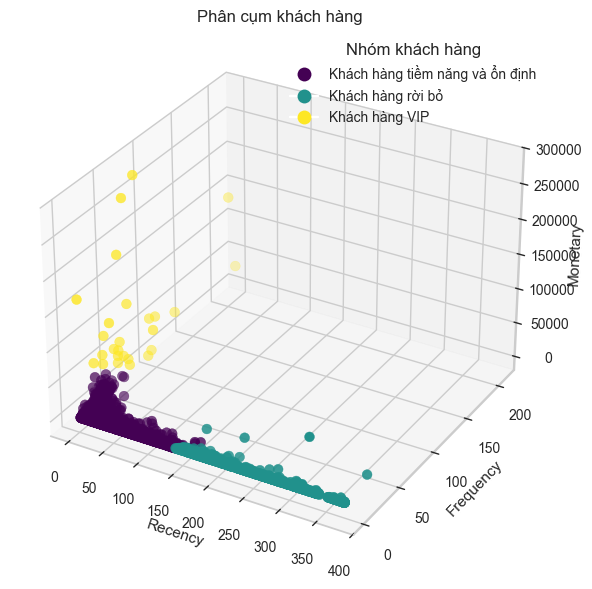

In [26]:
cluster_labels = {
    2:"Khách hàng VIP",
    1:"Khách hàng rời bỏ",
    0:"Khách hàng tiềm năng và ổn định"
}
data_viz = rfm.copy()
data_viz['Cluster'] = data_viz['Cluster']
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_viz['Recency'], data_viz['Frequency'], data_viz['Monetary'], 
                    c=data_viz['Cluster'], cmap='viridis', s=50)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/2), markersize=10) for i in range(3)]
ax.legend(handles, [cluster_labels[i] for i in range(3)], title="Nhóm khách hàng", loc='best')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Phân cụm khách hàng')
plt.show()

- Có thể thấy các nhóm khách hàng được phân tách khá rõ ràng, nhóm khách hàng tiềm năng chiếm ưu thế, nhóm khách hàng VIP chiếm số nhỏ nhưng mang lại danh thu lớn.

- Như vậy ta có thể đưa ra các chiến lược tương ứng với từng nhóm khách hàng:
    + Đối với khách hàng rời bỏ ta có thể đưa ra những ưu đãi hấp dẫn để mời chào họ quay trở lại nhưng nếu chi phí bỏ ra cho nhóm này lớn hơn lợi ích mang lại có thể cân nhắc không nên tập trung quá nhiều.
    + Đối với khách hàng tiềm năng và ổn định đây là nhóm mang lại doanh thu đều đặn cho công ty, nên chăm sóc và giữ chân họ bằng những khuyến mãi nhỏ.
    + Đối với khách hàng VIP đây là nhóm giá trị nhất mặc dù chiếm số lượng không quá nhiều, công ty nên chăm sóc cá nhân hóa cho từng khách hàng ở nhóm này như gửi lời cảm ơn, ưu đãi VIP và quà tri ân. Cố gắng giữ chân họ vì họ là 20% khách hàng nhưng mang lại 80% doanh thu cho công ty.

- Tóm lại ta có thể có các phương án với từng loại khách hàng:
    + VIP: giữ chân và chăm sóc đặc biệt.
    + Tiềm năng/ ổn định: duy trì.
    + Rời bỏ: tái kích hoạt hoặc cân nhắc buông bỏ.

## Định lượng hiệu quả chiến lược và gắn KPI kinh doanh

### Bảng tóm tắt Cluster

In [29]:
cluster_summary = rfm.groupby("Cluster").agg(
    n_customers = ("CustomerID", "nunique"),
    avg_recency = ("Recency", "mean"),
    avg_frequency = ("Frequency", "mean"),
    avg_monetary = ("Monetary", "mean"),
    revenue = ("Monetary", "sum")
).reset_index()

cluster_summary

,Cluster,n_customers,avg_recency,avg_frequency,avg_monetary,revenue
0,0,3231,41.445682,4.671928,1849.097726,5974434.753
1,1,1082,247.106285,1.582255,629.663689,681296.111
2,2,26,6.038462,66.500000,85826.078077,2231478.030


### Chiến lược giả định

- Về cơ bản 1 chiến lược sẽ có những thông số:
    + retention_target: % khách quay lại (giữ lại thêm)
    + freq_uplift: Số lần mua tăng thêm
    + aov_uplift: % tăng giá trị đơn hàng (cross/upsell)

- Ta có các chiến lược giả định sau 
    + Đối với nhóm khách hàng rời bỏ (1) ta dự định sẽ tung ra chiến dịch tặng voucher để lôi kéo họ quay lại và mỗi khách hàng quay lại sẽ mua thêm 1 đơn hàng và giá trị đơn hàng sẽ tăng 5% và 20% khách hàng sẽ quay lại mua hàng.
    + Đối với nhóm khách hàng tiềm năng và ổn định (0) ta chăm sóc bằng email và sẽ làm tăng khả năng mua thêm của nhóm này ta có retention_target = 0.1, số đơn hàng mua thêm là 0.2, giá trị đơn hàng tăng lên 0.01.
    + Đối với nhóm khách hàng VIP (2) ta dự định tặng VIP membership và dự kiến họ sẽ mua nhiều hơn một chút các chỉ số retention_target = 0.05, freq_uplift = 0.5, aov_uplift = 0.02 (tăng 2% giá trị đơn hàng).

In [31]:
strategy = pd.DataFrame({
    "Cluster": [0, 1, 2],
    "retention_target": [0.1, 0.2, 0.05],   
    "freq_uplift": [1, 0.2, 0.5],             
    "aov_uplift": [0.01, 0.05, 0.02]      
})

### Tính KPI kì vọng

- Để tính được KPI kì vọng ta có các công thức sau đây:
1) Doanh thu cơ bản: baseline_revenue = n_customers $\times$ avg_frequency $\times$ avg_monetary
2) Doanh thu tăng thêm: revenue_lift = n_customers $\times$ retention_target $\times$ (avg_frequency+freq_uplift) $\times$ avg_monetary $\times$ (1+aov_uplift)
3) Doanh thu kì vọng: expected_revenu = baseline_revenue + revenue_lift
4) KPI tổng thể:
    + Tổng doanh thu cơ bản: Total Baseline Revenue = $\Sigma$ baseline_revenue
    + Tổng doanh thu kì vọng: Total Expected Revenue = $\Sigma$ expected_revenue
    + Doanh thu tăng thêm: Revenue Lift = Total Expected Revenue - Total Expected Revenue
    + Tỷ lệ tăng trưởng doanh thu (%): Revenue Lift% = $\frac{Revenue Lift}{Total Baseline Revenue} \times 100$

In [ ]:
df = pd.merge(cluster_summary, strategy, on="Cluster", how="left")

# Tính toán theo công thức
df["baseline_revenue"] = df["n_customers"] * df["avg_frequency"] * df["avg_monetary"]

df["revenue_lift"] = (
    df["n_customers"]
    * df["retention_target"]
    * (df["avg_frequency"] + df["freq_uplift"])
    * df["avg_monetary"] * (1 + df["aov_uplift"])
)

df["expected_revenue"] = df["baseline_revenue"] + df["revenue_lift"]

df["revenue_lift_pct"] = (df["revenue_lift"] / df["baseline_revenue"]) * 100

print("\n--- KPI theo từng cluster ---")
print(df[["Cluster", "baseline_revenue", "revenue_lift", "expected_revenue", "revenue_lift_pct"]])


--- KPI theo từng cluster ---
   Cluster  baseline_revenue  revenue_lift  expected_revenue  revenue_lift_pct
0        0      2.791213e+07  3.422543e+06      3.133467e+07         12.261848
1        1      1.077984e+06  2.549911e+05      1.332975e+06         23.654439
2        2      1.483933e+08  7.624960e+06      1.560182e+08          5.138346


### KPI tổng hợp 

In [39]:
total_baseline = df["baseline_revenue"].sum()
total_expected = df["expected_revenue"].sum()
total_lift = total_expected - total_baseline
total_lift_pct = (total_lift / total_baseline) * 100
print("\n--- KPI tổng thể ---")
print(f"Tổng baseline revenue : {total_baseline:,.0f}")
print(f"Tổng expected revenue : {total_expected:,.0f}")
print(f"Doanh thu tăng thêm   : {total_lift:,.0f}")
print(f"Tỷ lệ tăng trưởng     : {total_lift_pct:.2f}%")


--- KPI tổng thể ---
Tổng baseline revenue : 177,383,403
Tổng expected revenue : 188,685,898
Doanh thu tăng thêm   : 11,302,495
Tỷ lệ tăng trưởng     : 6.37%


- Như vậy nếu tất cả các chiến lược thành công thì doanh thu có thể tăng trưởng 6,37%